In [1]:
import pandas as pd

In [5]:
train = pd.read_csv("D:/Academics Canada/AIDI/Semester 2/Capstone 2/Project/MNIST Dataset/sign_mnist_train.csv")
test = pd.read_csv("D:/Academics Canada/AIDI/Semester 2/Capstone 2/Project/MNIST Dataset/sign_mnist_test.csv")

In [7]:
label = train['label'].values

In [11]:
import numpy as np
unique_value = np.array(label)
np.unique(unique_value)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [12]:
train.drop('label', axis = 1, inplace = True)

In [14]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [16]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
label = label_binarizer.fit_transform(label)

In [17]:
label

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [19]:
import matplotlib.pyplot as plt
plt.imshow(images[1].reshape(28,28))

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, label, test_size = 0.3, random_state = 101)

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

Using TensorFlow backend.


In [22]:
batch_size = 128
num_classes = 24
epochs = 50

In [23]:
x_train = x_train / 255
x_test = x_test / 255

In [24]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

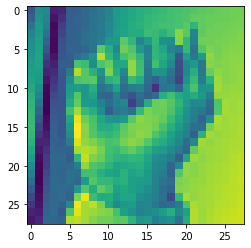

In [25]:
plt.imshow(x_train[0].reshape(28, 28))

In [26]:
model = Sequential()

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation = 'softmax'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [28]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])

In [29]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = epochs, batch_size = batch_size)

Train on 19218 samples, validate on 8237 samples
Epoch 1/50
19218/19218 [==============================] - 10s 532us/step - loss: 2.6127 - accuracy: 0.1911 - val_loss: 1.7004 - val_accuracy: 0.4978
Epoch 2/50
19218/19218 [==============================] - 10s 504us/step - loss: 1.3555 - accuracy: 0.5435 - val_loss: 0.8428 - val_accuracy: 0.7225
Epoch 3/50
19218/19218 [==============================] - 9s 492us/step - loss: 0.7897 - accuracy: 0.7297 - val_loss: 0.5205 - val_accuracy: 0.8425
Epoch 4/50
19218/19218 [==============================] - 9s 492us/step - loss: 0.5263 - accuracy: 0.8237 - val_loss: 0.3324 - val_accuracy: 0.8966
Epoch 5/50
19218/19218 [==============================] - 9s 491us/step - loss: 0.3631 - accuracy: 0.8789 - val_loss: 0.2186 - val_accuracy: 0.9395
Epoch 6/50
19218/19218 [==============================] - 9s 493us/step - loss: 0.2489 - accuracy: 0.9180 - val_loss: 0.1441 - val_accuracy: 0.9540
Epoch 7/50
19218/19218 [==============================] - 10s

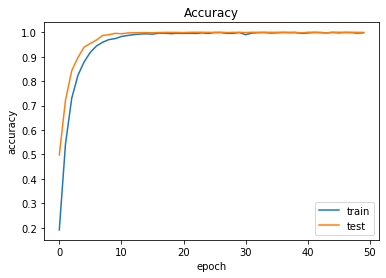

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.show()

In [34]:
test_labels = test['label']

In [35]:
test.drop('label', axis = 1, inplace = True)

In [36]:
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [37]:
test_labels = label_binarizer.fit_transform(test_labels)

In [38]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [39]:
y_pred = model.predict(test_images)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred.round())

0.8403513664249861